   # Object detection and Information Retrival from missing persons files
   
   ## @Team Black Mamba
   
   ### RIIAA-Hackaton-2021
   

In [1]:
#Cambio de modelo
import torch
import sys
import re
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings
import pandas as pd

In [2]:
make_detection=False
if make_detection:
    %run detect.py --weights modelo_final_odet.pt --source ./Reto1 --save-txt --name resultados

In [3]:
current_path=os.getcwd()
new_path=os.path.join(current_path,'runs/detect/resultados4')
etiquetas='labels'
imagenes='images'

In [4]:
#creción del diccionario para clases
cldict={}
cldict[0]='Fingerprints'
cldict[1]='Handwritting'
cldict[2]='Lines'
cldict[3]='Letters'
cldict[4]='Photo'
cldict[5]='Signature'
cldict[6]='Stamp'

In [5]:
def get_coords(size,yoloformat):
    dh,dw,_=size #Including a chanel for RGB images
    x,y,w,h=yoloformat
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
    return(l,r,t,b)

In [6]:
RES_PATH='testset'
if not os.path.exists(os.path.join(os.getcwd(),RES_PATH)):
    warnings.warn("Creating folder")
    os.makedirs(os.path.join(os.getcwd(),RES_PATH))
opath=os.path.join(os.getcwd(),RES_PATH)

In [7]:
import csv

lbls=os.path.join(new_path,etiquetas)
for i,label in enumerate(os.listdir(lbls)):
    name=os.path.join(opath,'.'.join(label.split('.')[:-1])+'.csv')
    g=open(name,'w', newline='')
    writer=csv.writer(g)
    writer.writerow(['filename','width','height','class','xmin','xmax','ymin','ymax'])
    f=open(os.path.join(lbls,label),'r')
    lineas=f.readlines()
    for line in lineas:
        clase=line[0]
        coordenadas=line[1:].split()
        if int(clase) in cldict.keys():
            if(len(coordenadas)==4):
                coordenadas=np.asarray(coordenadas,dtype='float32')
                coords=get_coords((640,640,3),coordenadas)
                writer.writerow(['.'.join(label.split('.')[:-1])+'.jpg',640,640,cldict[int(clase)],coords[0],coords[1],coords[2],coords[3]])
    g.close()
    f.close()

# Evaluación final usando cv2

In [21]:
#Conjunto de datos a analizar
csvs=os.listdir(opath)
indice_documento=8
sample=pd.read_csv(os.path.join(opath,csvs[indice_documento]))

In [22]:
dictcolores={}
dictcolores['Fingerprints']=(70, 93, 6)
dictcolores['Signature']=(93, 22, 6)
dictcolores['Lines']=(12, 29, 81)
dictcolores['Letters']=(73, 12, 81)
dictcolores['Photo']=(55, 212, 243)
dictcolores['Handwritting']=(75, 78, 66)
dictcolores['Stamp']=(212, 107, 48)

In [23]:
imags=os.path.join(os.getcwd(),'Reto1')
for name in os.listdir(imags):
    if '.'.join(name.split('.')[:-1]) == '.'.join(csvs[indice_documento].split('.')[:-1]):
        img=cv2.imread(os.path.join(os.getcwd(),'Reto1',name))
        print(name)

AGN_DFS_C.160_Murillo_de_Ramirez_Juventina_Martha_pg-005.jpg


In [24]:
original_shape=img.shape
img=cv2.resize(img,(640,640))
clases=[]
for i in range(len(sample['class'].tolist())):
    start=(sample['xmin'][i],sample['ymin'][i])
    end=(sample['xmax'][i],sample['ymax'][i])
    clase=sample['class'][i]
    clases.append(clase)
    nimg=cv2.rectangle(img,start,end,color=dictcolores[clase],thickness=2)
nimg=cv2.resize(nimg,original_shape[:-1])

Text(0.5, 1.0, 'Ejemplo de funcionalidad, objetos detectados')

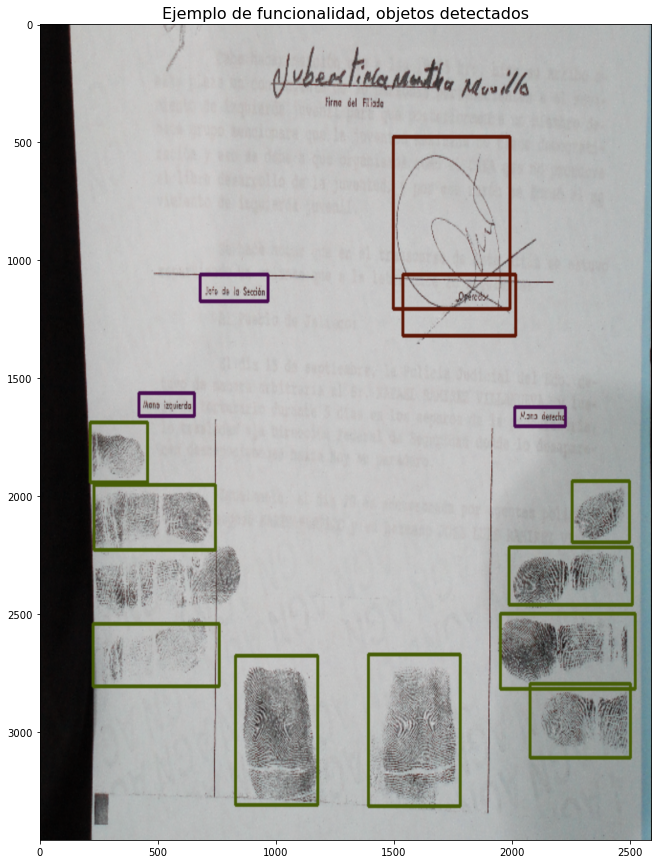

In [25]:
plt.figure(figsize = (15,15))
plt.imshow(np.asarray(nimg))
plt.title('Ejemplo de funcionalidad, objetos detectados',fontsize=16)

In [26]:
print("Clases detectadas: {}".format(clases))

Clases detectadas: ['Signature', 'Letters', 'Fingerprints', 'Letters', 'Fingerprints', 'Fingerprints', 'Letters', 'Fingerprints', 'Signature', 'Fingerprints', 'Fingerprints', 'Fingerprints', 'Fingerprints', 'Fingerprints']
